##1: K-Means Clustering on Iris Dataset:**

    - Use the Iris dataset to perform K-Means clustering.
    - Determine the optimal number of clusters using the elbow method.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [7]:
iris_df = load_iris()
X = iris_df.data
feature_names = iris_df.feature_names

# Convert to DataFrame (optional but nicer to inspect)
df = pd.DataFrame(X, columns=feature_names)
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##Apply K-Means clustering
different values of k and computing the inertia (within-cluster sum of squares), which is what the elbow method uses.

In [12]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

##elbow Method (find optimal number of clusters)

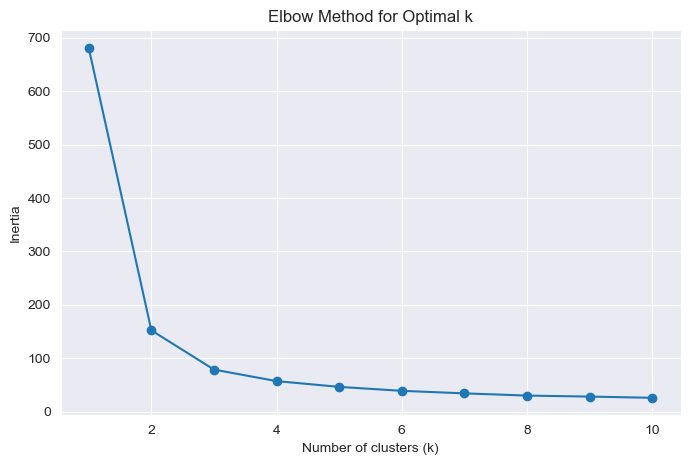

In [13]:

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


##Fit K-Means with optimal k = 3

In [14]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = clusters
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


##Visualize Cluster

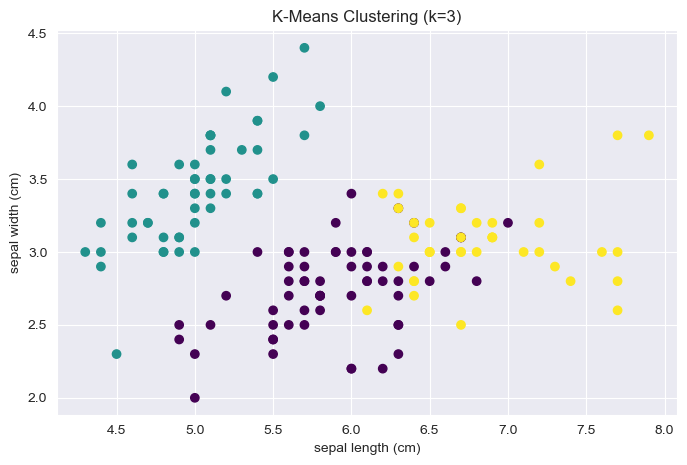

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    c=df['Cluster'],
    cmap='viridis'
)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering (k=3)')
plt.show()


##2:DBSCAN on Iris Dataset:
- Apply DBSCAN clustering on the Iris dataset.
- Experiment with different values for `eps` and `min_samples` to find meaningful clusters.

In [1]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA


##Load Iris Dataset & Preprocess
- DBSCAN is distance-based, so feature scaling is critical.


In [4]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target  # true labels (for evaluation only)

# Scale features - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Basic DBSCAN Run
- Start with a reasonable baseline.

In [5]:
dbscan = DBSCAN(eps=0.7, min_samples=5) # can be 0.5
labels = dbscan.fit_predict(X_scaled)



# Inspect cluster labels
# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise points
n_noise = np.sum(labels == -1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)



Clusters found: 2
Noise points: 6


##(Optional) Silhouette score

In [6]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print("Silhouette score:", score)


Silhouette score: 0.523400848673573


##Visualize clusters using PCA (2D)


In [7]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


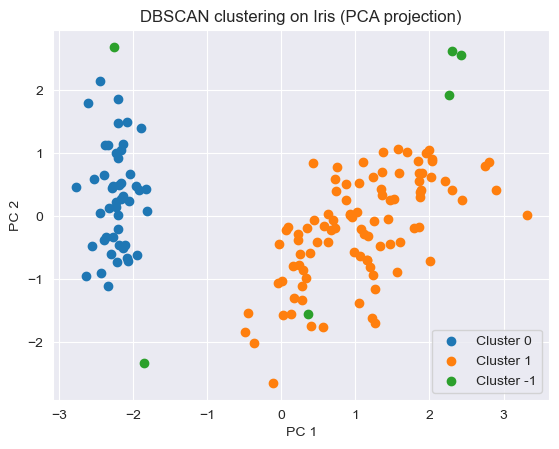

In [8]:
plt.figure()

for label in set(labels):
    mask = labels == label
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f"Cluster {label}"
    )

plt.title("DBSCAN clustering on Iris (PCA projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


##Experiment with different eps and min_samples

In [9]:
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)

        print(
            f"eps={eps}, min_samples={min_samples} | "
            f"clusters={n_clusters}, noise={n_noise}"
        )


eps=0.3, min_samples=3 | clusters=10, noise=84
eps=0.3, min_samples=5 | clusters=3, noise=120
eps=0.5, min_samples=3 | clusters=7, noise=17
eps=0.5, min_samples=5 | clusters=2, noise=34
eps=0.7, min_samples=3 | clusters=2, noise=5
eps=0.7, min_samples=5 | clusters=2, noise=6


Key intuition (short & practical)
1) eps → how close points must be to be considered neighbors
2) min_samples → how dense a region must be to form a cluster
3) Smaller eps → more noise
4) Larger eps → clusters merge
5) DBSCAN finds density, not “exactly 3 clusters”

In [ ]:
# DBSCAN - eps= 0.5

eps = 0.5
min_samples = 3

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)

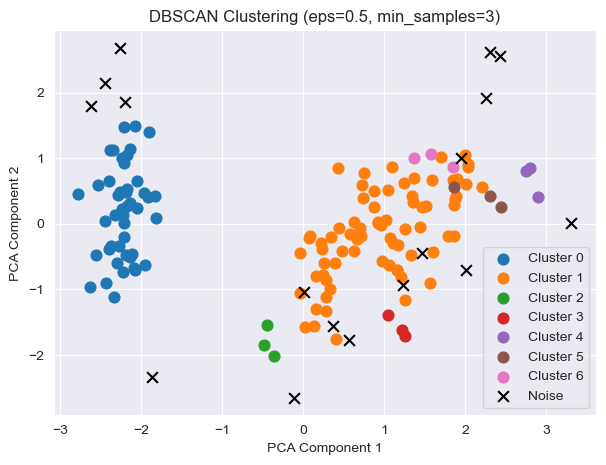

In [ ]:

#plot using eps 0.5
plt.figure(figsize=(7, 5))

unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(
            X_pca[labels == label, 0],
            X_pca[labels == label, 1],
            c="black",
            marker="x",
            s=60,
            label="Noise"
        )
    else:
        plt.scatter(
            X_pca[labels == label, 0],
            X_pca[labels == label, 1],
            s=60,
            label=f"Cluster {label}"
        )

plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()
